In [62]:
import ctd
import gsw
from ctd.read import _basename
import gsw
import requests
import os
import re
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cmo

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Create directory that includes all urls
data_url = {}
data_url['inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
data_url['central_inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
data_url['central_offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
data_url['offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'


<xarray.Dataset>
Dimensions:    (side: 2, xysize: 547305)
Dimensions without coordinates: side, xysize
Data variables:
    x_range    (side) float64 ...
    y_range    (side) float64 ...
    z_range    (side) float64 ...
    spacing    (side) float64 ...
    dimension  (side) int32 ...
    z          (xysize) float32 -36.0 -36.0 -36.25 ... -2249.8 -2256.3 -2261.8
Attributes:
    title:    Bathymetry Grid
    source:   \n\tProjection: Cylindrical Equidistant\n\tthis grid created by...

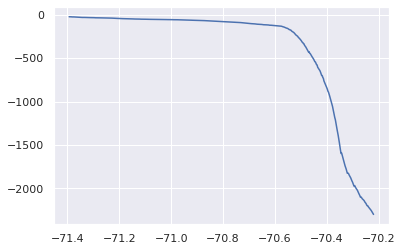

In [38]:
#Load in bathymetric data
bathymetry=xr.open_dataset('data/GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe

#Plot
z=bathymetry.z.values.reshape([535,1023]).mean(axis=1)
z2=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

#Get x range
x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)

plt.plot(x,z)
bathymetry

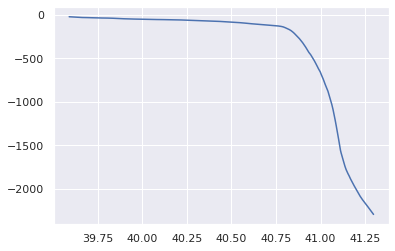

In [39]:
plt.plot(y,z2)

In [40]:
# Load the data file using xarray
def load2xarray(location):
    """
    Load data at given location and reduce to variables of interest.
    """
    ds = xr.open_dataset(data_url[location])
    ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
    print('Dataset '+ location +' has %d points' % ds.time.size)
    ds = ds[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']]
    return ds

profiles={}
for loc in list(data_url.keys()):
    profiles[loc] = load2xarray(loc)
profiles

Dataset inshore has 158237 points
Dataset central_inshore has 210513 points
Dataset central_offshore has 236989 points
Dataset offshore has 199587 points


{'inshore': <xarray.Dataset>
 Dimensions:                         (time: 158237)
 Coordinates:
     pressure                        (time) float64 ...
   * time                            (time) datetime64[ns] 2019-10-06T15:00:03...
     obs                             (time) int32 0 1 2 ... 158234 158235 158236
     lon                             (time) float64 ...
     lat                             (time) float64 ...
 Data variables:
     ctdpf_ckl_seawater_pressure     (time) float64 ...
     ctdpf_ckl_seawater_temperature  (time) float64 ...
     practical_salinity              (time) float64 ...
 Attributes:
     _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
     node:                            WFP01
     comment:                         
     publisher_email:                 
     sourceUrl:                       http://oceanobservatories.org/
     collection_method:               recovered_wfp
     stream:                          ctdpf_ckl_wfp

{'inshore': <xarray.Dataset>
 Dimensions:                         (time: 158237)
 Coordinates:
     lon                             (time) float64 ...
     obs                             (time) int32 0 1 2 ... 158234 158235 158236
   * time                            (time) datetime64[ns] 2019-10-06T15:00:03...
     lat                             (time) float64 ...
     pressure                        (time) float64 ...
 Data variables:
     ctdpf_ckl_seawater_pressure     (time) float64 ...
     ctdpf_ckl_seawater_temperature  (time) float64 ...
     practical_salinity              (time) float64 ...
 Attributes:
     _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
     node:                            WFP01
     comment:                         
     publisher_email:                 
     sourceUrl:                       http://oceanobservatories.org/
     collection_method:               recovered_wfp
     stream:                          ctdpf_ckl_wfp

In [23]:
profiles['inshore'].practical_salinity
#     for cast in profiles:
#         names = [df._metadata.get("name") for df in profiles]
#         lons, lats, data = [], [], []
#         lons.append(cast._metadata.get("lon"))
#         lats.append(cast._metadata.get("lat"))
#         data.append(cast[var])



<xarray.DataArray 'practical_salinity' (time: 158237)>
[158237 values with dtype=float64]
Coordinates:
    pressure  (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-31T21:22:...
    obs       (time) int32 0 1 2 3 4 5 ... 158232 158233 158234 158235 158236
    lon       (time) float64 ...
    lat       (time) float64 ...
Attributes:
    comment:                  Salinity is generally defined as the concentrat...
    long_name:                Practical Salinity
    precision:                4
    data_product_identifier:  PRACSAL_L2
    standard_name:            sea_water_practical_salinity
    units:                    1
    ancillary_variables:      pressure conductivity temperature
    _ChunkSizes:              10000

In [25]:
profiles['inshore'].ctdpf_ckl_seawater_temperature 

<xarray.DataArray 'ctdpf_ckl_seawater_temperature' (time: 158237)>
[158237 values with dtype=float64]
Coordinates:
    pressure  (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-31T21:22:...
    obs       (time) int32 0 1 2 3 4 5 ... 158232 158233 158234 158235 158236
    lon       (time) float64 ...
    lat       (time) float64 ...
Attributes:
    comment:                  Seawater temperature near the sensor.
    long_name:                Seawater Temperature
    precision:                4
    data_product_identifier:  TEMPWAT_L1
    standard_name:            sea_water_temperature
    units:                    ºC
    ancillary_variables:      ctdpf_ckl_seawater_temperature_qartod_results c...
    _ChunkSizes:              10000

In [27]:
profiles['inshore'].lat.to_dataframe

<bound method DataArray.to_dataframe of <xarray.DataArray 'lat' (time: 158237)>
[158237 values with dtype=float64]
Coordinates:
    pressure  (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-31T21:22:...
    obs       (time) int32 0 1 2 3 4 5 ... 158232 158233 158234 158235 158236
    lon       (time) float64 ...
    lat       (time) float64 ...
Attributes:
    units:          degrees_north
    standard_name:  latitude
    axis:           Y
    _ChunkSizes:    511>

In [106]:
#Extract a single time for a single day and plot all side by side
I_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
CI_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
O_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [107]:
ids = xr.open_dataset(I_URL)
cids = xr.open_dataset(CI_URL)
cods = xr.open_dataset(CO_URL)
ods = xr.open_dataset(O_URL)

In [108]:
ids = ids.swap_dims({'obs': 'time'}) #Swap dimensions
cids = cids.swap_dims({'obs': 'time'}) #Swap dimensions
cods = cods.swap_dims({'obs': 'time'}) #Swap dimensions
ods = ods.swap_dims({'obs': 'time'}) #Swap dimensions
ids

<xarray.Dataset>
Dimensions:                                          (time: 158237)
Coordinates:
    obs                                              (time) int32 0 1 ... 158236
    lon                                              (time) float64 ...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    preferred_timestamp                              (time) object ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:    

In [109]:
# select same day for each profiler
datesel='2019-10-15T03'
ids15=ids.sel(time=datesel, method="nearest")
cids15=cids.sel(time=datesel, method="nearest")
cods15=cods.sel(time=datesel, method="nearest")
ods15=ods.sel(time=datesel, method="nearest")
ids15

<xarray.Dataset>
Dimensions:                                          (time: 801)
Coordinates:
    obs                                              (time) int32 51980 ... 5...
    lon                                              (time) float64 ...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 b'33333333333333333...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 b'33333333333333333...
    deployment                                       (time) int32 ...
    preferred_timestamp                              (time) object ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobse

(500.0, 0.0)

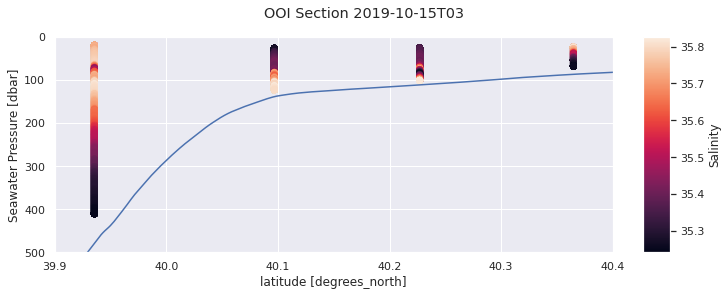

In [110]:
# Plot spatial section: practical salinity 
fig,ax = plt.subplots(ncols=1,figsize=(10,4),sharey=True,constrained_layout=True)

cci=ids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure",
                        c=ids15.practical_salinity.data,
                        cmap = plt.get_cmap('cmo.haline',30),vmin=34,vmax=36.3)
ccci=cids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                         c=cids15.practical_salinity.data,
                        cmap = plt.get_cmap('cmo.haline',30),vmin=34,vmax=36.3)
ccco=cods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                         c=cods15.practical_salinity.data,
                        cmap = plt.get_cmap('cmo.haline',30),vmin=34,vmax=36.3)
cco=ods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                       c=ods15.practical_salinity.data,
                       cmap = plt.get_cmap('cmo.haline',30),vmin=34,vmax=36.3)

#Indicate profile position

plt.gca().invert_yaxis()
plt.colorbar(cci, label='Salinity')
fig.suptitle(f"OOI Section {datesel}")

#Load in bathymetric data
bathymetry=xr.open_dataset('data/GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe

#Plot
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

#Get y range
x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535) # Longitude
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023) #Latitude OOI North to South
#gsw.p_from_z()

#PLot bathymetry 
plt.plot(y,-z)
plt.xlim(39.9,40.4) # lims inshore and offshore stations
plt.ylim(500,0) #maximum depth offshore ~451m

(500.0, 0.0)

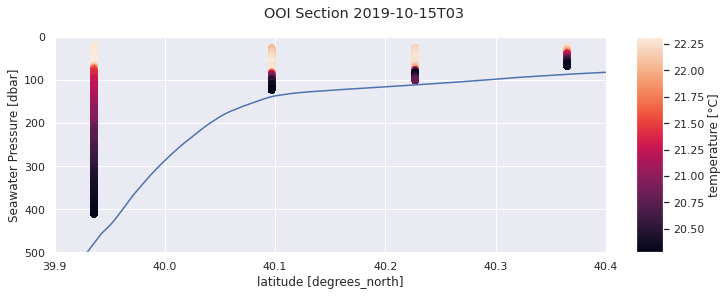

In [96]:
# Plot spatial section: temperature 
fig,ax = plt.subplots(ncols=1,figsize=(10,4),sharey=True,constrained_layout=True)

cci=ids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure",
                        c=ids15.ctdpf_ckl_seawater_temperature,
                        cmap = plt.get_cmap('cmo.haline',30))
ccci=cids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                         c=cids15.ctdpf_ckl_seawater_temperature,
                        cmap = plt.get_cmap('cmo.haline',30))
ccco=cods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                         c=cods15.ctdpf_ckl_seawater_temperature,
                        cmap = plt.get_cmap('cmo.haline',30))
cco=ods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", 
                       c=ods15.ctdpf_ckl_seawater_temperature,
                       cmap = plt.get_cmap('RdYlBu_r',30))

plot.scatter

plt.gca().invert_yaxis()
plt.colorbar(cci, label='temperature [\N{DEGREE SIGN}C]')
fig.suptitle(f"OOI Section {datesel}")

#Load in bathymetric data
bathymetry=xr.open_dataset('data/GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe

#Plot
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

#Get x range
x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535) # Longitude
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023) #Latitude OOI North to South
#gsw.p_from_z()

#PLot bathymetry 
plt.plot(y,-z)
plt.xlim(39.9,40.4) # lims inshore and offshore stations
plt.ylim(500,0) #maximum depth offshore ~451m

In [113]:
# Spatial Interpolation 
# Plot spatial section: practical salinity using cmocean

